### Spectral skewness classifies individuals
May 31, 2018

In [74]:
%matplotlib inline

# imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import decomposition, svm, discriminant_analysis

### Gathering data and parsing subjects

In [48]:
data_file = '/Users/rdgao/Documents/data/Misc/subject_skews.npy'
data = np.load(data_file)
subj_list = []
for i in data.item():
    subj_list.append(i)

# get frequency axis & number of channels
f_axis = [k for k, v in data.item().get(subj_list[0]).items()]
num_chan = len(data.item().get(subj_list[0])[f_axis[0]])
num_subj = len(subj_list)

# get all skewness data into np array
skew_data = np.zeros((num_subj, num_chan, len(f_axis))) #subj, electrode, freq
for i_s, subj in enumerate(subj_list):
    for i_f, freq in enumerate(f_axis):
        skew_data[i_s,:,i_f] = data.item().get(subj)[freq]    

### Summary across subjects

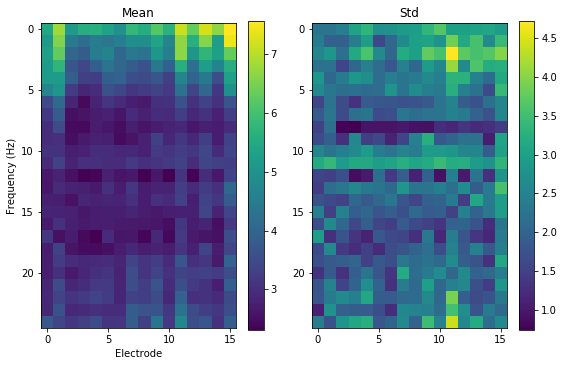

In [102]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
#plt.imshow((skew_data[:,:,:].std(axis=0)/skew_data[:,:,:].mean(axis=0)).T)
plt.imshow(skew_data[:,:,:].mean(axis=0).T)
plt.colorbar()
plt.xlabel('Electrode')
plt.ylabel('Frequency (Hz)')
plt.title('Mean')
plt.subplot(1,2,2)
plt.imshow(skew_data[:,:,:].std(axis=0).T)
plt.title('Std')
plt.colorbar()
plt.tight_layout()

### Classification

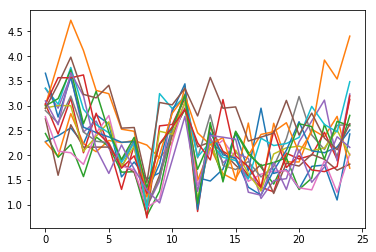

In [98]:
plt.plot(skew_data[:,:,:].std(axis=0).T);

# feat = skew_data[:,:,7:12].mean(axis=2)
# print(feat.shape)

# lda = discriminant_analysis.LinearDiscriminantAnalysis()
# lda.fit(feat, np.arange(len(subj_list)))